## Multidimensional search with gradient-search methods
## The objective is to find a minimum of a multivariate function

Luca Magri (lm547@cam.ac.uk)

(With many thanks to Professor Gábor Csányi.)

Multivariate function = multi-variable function = function that depends on two variables at least

## Direct search for multi-variable functions

- We assume we can evaluate the function $f(x)$ that is to be minimised 
- If we do not have access to the gradient, we can perform a __direct search__
- A generalisation of the interval search for multiple variables is the Nelder-Mead method, which is robust but slow

- For example, we rarely have access to the gradient when the objective function is the result of a complex simulation, e.g.,"lift on an aircraft wing", "melting point of a material", "efficiency of a circuit design", etc.
 
 - Aside: Sometimes we create a __surrogate model__, which approximates the objective function, but provides analytical gradients. __Machine Learning__ methods provide surrogate models. 

## Search directions for multi-variable functions
- Access to the gradient enables __gradient search__, which is more efficient than direct (gradient-free) search

- Access to the Hessian (the gradient of the gradient) can improve convergence significantly
 - The computation of the Hessian is straightforward to do for problems with only a few variables
 - The computation of the Hessian may be computationally expensive for problems with many variables, say, thousands or more

 - Even a rough approximation of the Hessian can be beneficial (see "preconditioning")

## Lectures 3 and 4: List of contents 
In these lectures, we will analyse some common search-direction methods for multidimensional search

1. Steepest descent method 

1. Newton-Raphson method

1. Barzilai-Borwein (BB) method

1. Conjugate-gradient (CG) method

1. Newton-Gauss method

## Nomenclature

- $f(x): \mathbb{R}^N\rightarrow\mathbb{R}$ is a nonlinear function, which we want to minimize

- $x^*\in\mathbb{R}^N$ is a minimum of $f$

- $\nabla f = \begin{pmatrix}
\frac{\partial f}{\partial x_1}, 
\frac{\partial f}{\partial x_2}, 
\ldots, 
\frac{\partial f}{\partial x_N}
 \end{pmatrix}^T = \frac{\partial f}{\partial x_i}$, $i=1,2,\ldots, N$ is the gradient 
 
- $H=\nabla(\nabla f(x))=\nabla^2 f(x)$ is the Hessian $$H_{i,j}=\frac{\partial^2 f}{\partial x_i\partial x_j}\;\;\;\;\;i,j=1,2,\ldots,N$$

- $k=0,1,2,\ldots$ is the iteration step

- $d_k$ is the $k$-th search direction

- $\alpha_k$ is the step size to take along the $k$-th search direction

- h.o.t. stands for "higher order terms"







## Revision on Taylor expansion for multi-variable functions
- A function that is differentiable infinite times can be expressed as a Taylor series around a point
- We will consider terms up to second order
- The Taylor expansion of the multi-variable function $f(x)$ around the point $x_k$ is
\begin{align}
f(x) = f(x_k) + \nabla f(x_k)^T (x - x_k) + \frac12 (x-x_k)^T H(x_k) (x-x_k) + h.o.t.
\end{align}

- The term $\nabla f(x_k)^T (x - x_k)$ is called first-order term
- The term $\frac12 (x-x_k)^T H(x_k) (x-x_k)$ is called second-order term
- h.o.t. stands for higher-order terms

## Steepest descent method 
We exploit the fact that the gradient is the direction of maximum first-order change of a multi-variable function $f(x)$ 
1. Start with an initial guess for the minimum $x_0$
1. Set the search direction as the negative gradient $$d_k \equiv -\nabla f(x_k)$$
1. Determine by _line search_ the step size $\alpha_k$ that minimizes $$f(x) \;\;\; \textrm{along} \;\;\;d_k$$ 
1. Update the solution $x_{k+1} = x_k + \alpha_k d_k$
1. If not converged, back to 2. 

- Notice __nested structure__: 
 - The main loop in step 2 changes the _direction_
 - The inner loop in step 3 is optimisation in 1D 

 - How accurate should this inner optimisation (line search) be?
 - Ideally, 
 $$\frac{d f(x_k+\alpha_k d_k)}{d\alpha_k} =
 0$$
 which implies that the gradient at $x_k+\alpha_k d_k$ is orthogonal to $d_k$, i.e., successive search directions are orthogonal to each other
 $$ \boxed{d^T_k d_{k+1} =0}$$

 - Proof (optional): 
 \begin{align}
 \frac{d f(x_k+\alpha_k d_k)}{d\alpha_k} &=0\\
 \frac{df(x_{k+1})}{d\alpha}& =0 \\
 \frac{\partial f(x_{k+1})}{\partial x_{k+1}}\cdot\frac{\partial x_{k+1}}{\partial\alpha} & =0 \\
 \nabla f(x_{k+1}) \cdot \frac{\partial (x_{k}+\alpha_k d_k)}{\partial\alpha} & =0\\
  -d_{k+1} \cdot d_k & =0\\
 \end{align}
 Therefore
 $d^T_k d_{k+1} =0$

 - Geometric interpretation: If the gradient $-d_{k+1}$ had a component along $x_k+\alpha_k d_k$, then $x_k+\alpha_k d_k$ could not be a minimum of $f(x_k+\alpha_k d_k)$, which contradicts the hypothesis. Hence, the gradient must have a zero component along $x_k+\alpha_k d_k$, which means that it must be orthogonal to $d_k$.

- Practically, an approximate line search is performed
  $$\frac{d f(x_k+\alpha_k d_k)}{d\alpha_k} \approx
 0$$
 hence 
 $$ \boxed{d^T_k d_{k+1} \approx0 }$$
- If we approximate the function with a second-order Taylor expansion, the step size is
$$ \alpha_k= - \frac{\nabla f(x_k)^Td_k}{d_k^TH(x_k)d_k}$$
   However, if you have the Hessian $H$, you may want to use better search methods (e.g., Newton-Raphson)
 - If the approximation is poor, the algorithm might not converge
 - If the approximation is too accurate, it could be a waste of resources because we are only making progress along the current search direction 
 - Tradeoff: $f(x_k+\alpha_k d_k)$ is often approximated by a quadratic polynomial, or a maximum number of iterations is set 

Example with the Rosenbrock function
$$ f(x_1, x_2) = (1-x_1)^2 + a(x_2-x_1^2)^2$$
 where $x_1$ and $x_2$ are the two variables on which $f$ depend (in this example, they have nothing to do with the iteration), and $a=10$
- The gradient is 
\begin{align}\nabla f(x_1,x_2) 
& = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\\frac{\partial f}{\partial x_2} \end{bmatrix} \\
& = \begin{bmatrix} \frac{\partial \left((1-x_1)^2 + a(x_2-x_1^2)^2\right)}{\partial x_1} \\\frac{\partial \left( (1-x_1)^2 + a(x_2-x_1^2)^2\right)}{\partial x_2} \end{bmatrix} \\ 
& = \begin{bmatrix}  -2(1-x_1)-4ax_1(x_2-x_1^2) \\ 2a(x_2-x_1^2) \end{bmatrix}
\end{align}

In [1]:
from pylab import *
import numpy as np
# function we will optimize
def Rosen(x,a=10):
    return (1-x[0])**2 + a*(x[1]-x[0]**2)**2
def dRosen(x,a=10):
    return np.array([-2.0*(1.0-x[0]) - 2.0*a*(x[1]-x[0]**2)*2.0*x[0],2.0*a*(x[1]-x[0]**2)])

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
def linesearch_golden_section(f, x, d, alpha_init=None, xtol=1e-8):
    
    def fa(a):
        return f(x+a*d)
    
    # initial point
    alpha0 = 0
    f0 = fa(alpha0)
    
    # now find a bracket for the minimum
    if alpha_init == None:
        alpha1 = 1.0
    else:
        alpha1 = alpha_init
        
    # check to see if the point at alpha1 goes down, if not find one that does
    while fa(alpha1) > f0:
        alpha1 /= 2.0
        print (alpha0, f0, alpha1, fa(alpha1))
    
    f1 = fa(alpha1)
    
    # set up golden section ratio
    r = (np.sqrt(5)-1)/2.0
    # now find the outer bracket alpha2 where the function goes up again
    alpha2 = alpha1/r
    while fa(alpha2) < f1:
        alpha1 = alpha2
        alpha2 = alpha1/r
    f2 = fa(alpha2)
    
    # now we have three points in Golden Section ratio, (alpha0, alpha1, alpha2) such that the function goes down then up,
    # so it must have a minimum in between
    
    # now loop until convergence
    while abs(alpha0-alpha2) > xtol:
        # get 4th point
        alpha3 = alpha0*r+alpha2*(1-r); f3=fa(alpha3) # 0,3,1,2
        
        # depending on where the function value falls, update the brackets
        if f3 < f1:
            alpha2=alpha1; f2=f1
            alpha1=alpha3; f1=f3
        else:
            alpha0=alpha2; f0=f2
            alpha2=alpha3; f2=f3
    return 0.5*(alpha0+alpha2)
        
    
def steepest_descent(f, df, x0, ftol, xtol):
    traj = []
    
    # get initial direction
    x = x0[:]
    d = -1.0*df(x)
    alpha_init = 1e-6
    i = 0
    #print i, f(x), np.linalg.norm(d), x[:], d[:]
    traj.append((x[0],x[1]))

    # loop until convergence
    while np.linalg.norm(d) > ftol:
        i += 1
        # do line search in current direction 
        alpha = linesearch_golden_section(f, x, d, alpha_init, xtol)
        # update estimate
        x += alpha*d
        # get new direction        
        d = -1.0*df(x)
        
        
        #print i, f(x), np.linalg.norm(d), x[:], d[:]
        traj.append((x[0],x[1]))

    return x[:],traj      

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


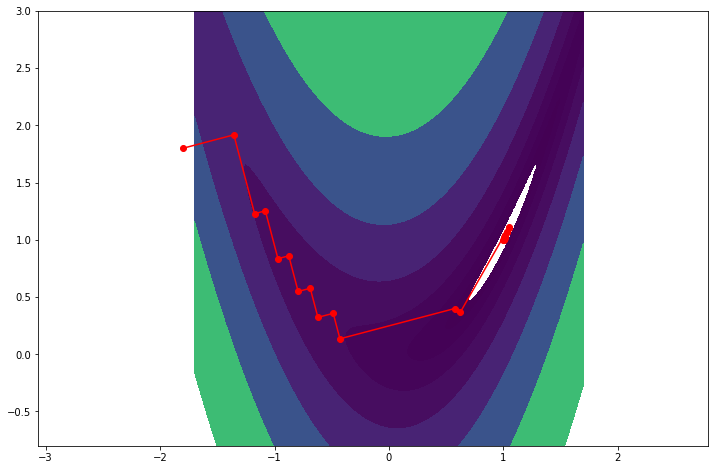

In [3]:
x,y = np.meshgrid(np.linspace(-1.7,1.7,100), np.linspace(-0.8,3,100))
R = [[Rosen(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]

fig = figure(figsize=(12,8))
contourf(x, y, R, np.logspace(-1,2, 8))
plt.axes().set_aspect('equal', 'datalim')
xmin, traj = steepest_descent(Rosen,dRosen, np.array([-1.8,1.8]), 1e-3, 1e-8)

plot([traj[i][0] for i in range(len(traj))], [traj[i][1] for i in range(len(traj))], "r-o")

show()

Example with quadratic function
\begin{align} 
f(x_1,x_2) & =x_1^2+x_2^2-1.9x_1x_2\\
 & = \frac{1}{2}\begin{bmatrix} x_1 \;\;\;x_2\end{bmatrix} \begin{bmatrix} 2 & -1.9\\ -1.9& 2\end{bmatrix}  \begin{bmatrix} x_1 \\x_2\end{bmatrix}\\
\end{align}

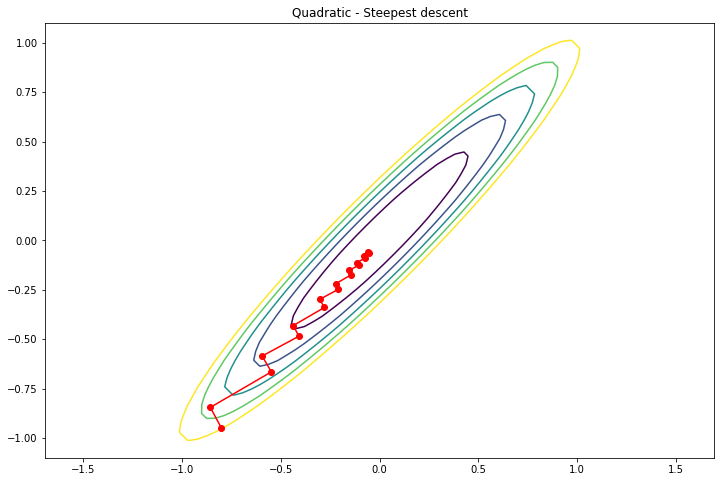

In [4]:
def Q(x):
    return x[0]**2+ x[1]**2 - 1.9*x[0]*x[1]
def dQ(x):
    return np.array([2*x[0]-1.9*x[1], 2*x[1]-1.9*x[0]])

x, y = np.meshgrid(np.linspace(-1.1,1.1,50), np.linspace(-1.1,1.1,50))
Qxy = [[Q(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]
figure(figsize=(12,8))
contour(x, y, Qxy, linspace(0, 0.1, 6))
title("Quadratic - Steepest descent")
axis('equal')
#axis([-1.5, 1.5, -1.1, 1.1])

xmin, traj = steepest_descent(Q, dQ, np.array([-0.8, -0.95]), 1e-2, 1e-2)
plot([traj[i][0] for i in range(len(traj))], [traj[i][1] for i in range(len(traj))], "r-o")

show()

## Convergence of steepest descent 

- This algorithm converges __linearly__ ($p = 1$) 

$$ \left\| x_{k+1}-x^*\right\| = \beta \left\| x_k - x^*\right\| $$

- $\beta$ is close to 1, hence the steepest descent is slow. As a consequence of [Kantorovich Inequality](http://mathworld.wolfram.com/KantorovichInequality.html), it can be shown that 
$$ \beta \le \left[\frac{k-1}{k+1}\right]^2 $$ 
where $k$ is the condition number, which is the ratio between the largest and smallest eigenvalues of $H(x^*)$. 

- In typical engineering problems, this ratio approaches 1 as the number of variables increases.
- Quadratic problems with ill-conditioned matrices lead to poor convergence of steepest descent. 
  - Loosely speaking, ill-conditioned quadratic functions have isocontours that resemble elongated valleys.
  - Isocontour = contour, which is defined as $f(x)=c$ where $c$ is a constant

## Newton-Raphson method

- We assume we can evaluate the gradient, $\nabla f(x)$, and the Hessian, $H(x)=\nabla^2f(x)$
- $f(x)$ is approximated by a quadratic function using the function value, gradient and Hessian at the current location 
- Mathematically, the function is Taylor expanded around $x_k$

$$ f(x) = f(x_k) + \nabla f(x_k)^T (x - x_k) + \frac12 (x-x_k)^T H(x_k) (x-x_k) + h.o.t. $$

- The higher order terms (h.o.t.) are neglected and $f$ is approximated by $q$

$$ f(x)\approx q(x) = f(x_k) + \nabla f(x_k)^T (x - x_k) + \frac12 (x-x_k)^T H(x_k) (x-x_k) $$

 - The minimum of $q(x)$ occurs when $\nabla q(x) = 0$ $$
\begin{array}
\\
\nabla q(x) &= \nabla f(x_k) + H(x_k) (x-x_k) = 0\\
x &= x_k - [H(x_k)]^{-1} \nabla f(x_k)\\
\end{array}
$$

- We use the minimum of $q(x)$ as our next guess for the minimum of $f(x)$ $$
x=x_{k+1} = x_k + \alpha_k d_k
$$ 

 - Therefore, the search direction is $
d_k = - [H(x_k)]^{-1} \nabla f(x_k)
$ and the step size is $\alpha_k = 1$.

In [5]:
def ddQ(x):
    return np.matrix([[2, -1.9], [-1.9, 2]])

def newton(f, df, ddf, x0, ftol, xtol=1e-3):
    traj = []
    
    # get initial direction
    x = np.array(x0[:])
    d = -1.0*asarray(np.matmul(np.linalg.inv(ddf(x)),df(x)))[0]
    
    i = 0
    #print i, f(x), np.linalg.norm(d), x[:], d[:]
    traj.append((x[0],x[1]))

    # loop until convergence
    while np.linalg.norm(d) > ftol:
        i += 1
        # update estimate
        x += d
        # get new direction        
        d = -1.0*asarray(np.matmul(np.linalg.inv(ddf(x)),df(x)))[0]
        
        #print i, f(x), np.linalg.norm(d), x[:], d[:]
        traj.append((x[0],x[1]))

    return x[:],traj

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'color'
  s)


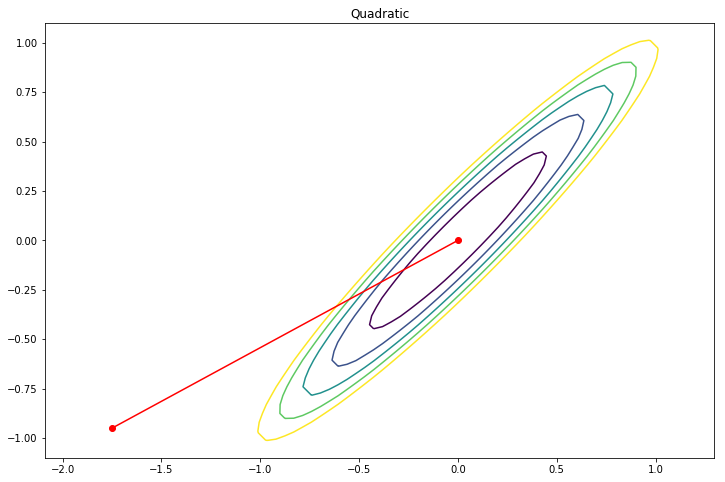

In [6]:
x, y = np.meshgrid(np.linspace(-1.1,1.1,50), np.linspace(-1.1,1.1,50))
Qxy = [[Q(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]
figure(figsize=(12,8))
contour(x, y, Qxy, linspace(0, 0.1, 6), color="k")
title("Quadratic")
axis('equal')
xmin, traj = newton(Q, dQ, ddQ, np.array([-1.75, -0.95]), 1e-2, 1e-2)
plot([traj[i][0] for i in range(len(traj))], [traj[i][1] for i in range(len(traj))], "r-o")

show()

## Convergence of Newton-Raphson method

- It is a __quadratically convergent__ method ($p=2$)

$$ \left\| x_{k+1} - x^*\right\| \leq \beta \left\| x_k - x^*\right\|^2 $$

- Therefore, it converges to the minimum in one iteration in a quadratic function
- It needs more iterations in a non-quadratic nonlinear function

Newton-Raphson method is not very robust: 
- It may never converge if the initial guess is not appropriate
<!--- Once you are quite close to the answer (in the _asymptotic limit_)--->
- If $H(x)$ is not positive definite, the method can converge to a maximum, or a saddle point, etc.
- It can take the iterations away from a minimum 

Example with Rosenbrock function
- The gradient is 
$$ \nabla f(x_1,x_2) 
= \begin{bmatrix}  -2(1-x_1)-4ax_1(x_2-x_1^2) \\ 2a(x_2-x_1^2) \end{bmatrix}
$$
- The Hessian is
\begin{align}\nabla^2 f(x_1,x_2) 
&= \begin{bmatrix} \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1\partial x_2}\\ \frac{\partial^2 f}{\partial x_2\partial x_1}& \frac{\partial^2 f}{\partial x_2^2} \end{bmatrix}\\
&= \begin{bmatrix} \frac{\partial \left(-2(1-x_1)-4ax_1(x_2-x_1^2)\right)}{\partial x_1} \;\;& \frac{\partial \left(-2(1-x_1)-4ax_1(x_2-x_1^2)\right)}{\partial x_2}\\ \frac{\partial \left(2a(x_2-x_1^2)\right)}{\partial x_1}& \frac{\partial \left(2a(x_2-x_1^2)\right)}{\partial x_2} \end{bmatrix}\\
&=  \begin{bmatrix} 2-4a(x_2-x_1^2)+8ax_1^2 \;\;& -4ax_1\\ -4ax_1 &  2a \end{bmatrix}
\end{align}
 If the function has continuous second derivatives (such as the function of this example), the mixed partial derivatives are equal to each other.
 - Hence, the Hessian is symmetric (aside: [Schwarz's theorem](https://en.wikipedia.org/wiki/Symmetry_of_second_derivatives#Schwarz's_theorem))

In [7]:
def ddRosen(x,a=10):
    return np.matrix([[2.0 - 4.0*a*(x[1]-x[0]**2) - 4.0*a*(-2.0*x[0])*x[0], -4.0*a*x[0]],
                      [-4.0*a*x[0]                                        ,   2.0*a ]])

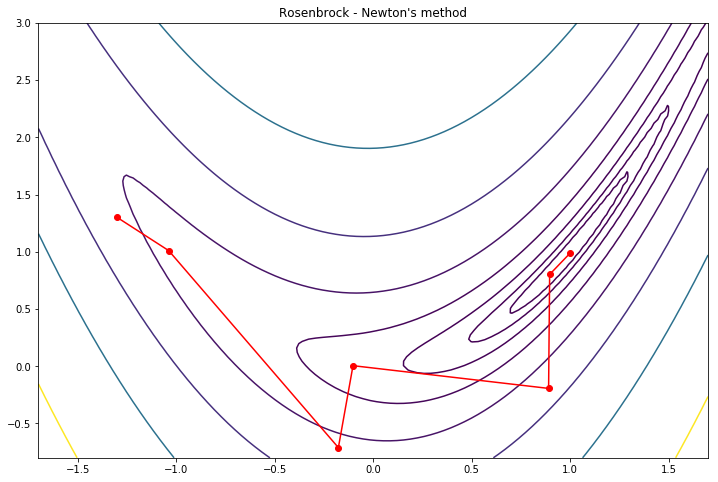

In [8]:
x,y = np.meshgrid(np.linspace(-1.7,1.7,100), np.linspace(-0.8,3,100))
R = [[Rosen(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]

fig = figure(figsize=(12,8))
contour(x, y, R, np.logspace(-1,2, 8), color="k")
title("Rosenbrock - Newton's method")

xmin, traj = newton(Rosen, dRosen, ddRosen, np.array([-1.3, 1.3]), 1e-1, 1e-8)
plot([traj[i][0] for i in range(len(traj))], [traj[i][1] for i in range(len(traj))], "r-o")

show()

## Newton-Raphson method with line search

- This is the natural extension to the previous method
  - The step size $\alpha_k$ is found by a line search at each iteration

<!---$$
x_{k+1} = x_k + \alpha_k d_k
$$
With the direction given by
$$
d_k = - [H(x_k)]^{-1} \nabla f(x_k)
$$
Optimise $\alpha$ in each iteration. --->

- This method
 - often speeds up the convergence
  - will find a minimum, not a saddle point or a maximum (when it converges)
  - can fail (try the initial guess $[-1.5,1.5]$ in the code)<!---, direction points uphill!--->
  - "Trust region" methods do not allow too big a step, which reduces the failure of the method 

In [ ]:
def newton_raphson(f, df, ddf, x0, ftol, xtol=1e-3):
    traj = []
    
    # get initial direction
    x = np.array(x0[:])
    d = -1.0*asarray(np.matmul(np.linalg.inv(ddf(x)),df(x)))[0]
    
    i = 0
    #print i, f(x), np.linalg.norm(d), x[:], d[:]
    traj.append((x[0],x[1]))

    alpha_init = 1e-6

    # loop until convergence
    while np.linalg.norm(d) > ftol:
        i += 1
        # do line search in current direction 
        alpha = linesearch_golden_section(f, x, d, alpha_init, xtol)
        #print alpha
        # update estimate
        x += alpha*d
        # get new direction        
        d = -1.0*asarray(np.matmul(np.linalg.inv(ddf(x)),df(x)))[0]
        
        #print i, f(x), np.linalg.norm(d), x[:], d[:]
        traj.append((x[0],x[1]))
        print x
        w, v = np.linalg.eig(ddf(x))
        print("Eigenvalues:", w)

    return x[:],traj




In [ ]:
x,y = np.meshgrid(np.linspace(-1.7,1.7,100), np.linspace(-0.8,3,100))
R = [[Rosen(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]

fig = figure(figsize=(12,8))
contour(x, y, R, np.logspace(-1,2, 30), color="k")
title("Rosenbrock - Newton-Raphson method")

xmin, traj = newton_raphson(Rosen, dRosen, ddRosen, np.array([-1.3, 1.3]), 1e-1, 1e-8)
plot([traj[i][0] for i in range(len(traj))], [traj[i][1] for i in range(len(traj))], "r-o")

show()

## Caveat on Newton-type methods 

- Computing and inverting the Hessian requires   
    - Computation $\sim O(N^2)$
    - Inversion   $\sim O(N^3)$
- In engineering applications, $N$ can be thousands, millions, billions
- If $H$ is sparse, this helps speed up computation and inversion

## Barzilai-Borwein method

- Reminder: The __secant method__  approximates the Hessian by finite difference to yield

$$
x = x_1 - f'(x_1) \frac{x_1-x_0}{f'(x_1)-f'(x_0)}
$$

- There is a multidimensional generalisation (Barzilai & Borwein, IMA J. Num. Analys., __8(1)__, 141-148, 1998)

$$
x = x_1 - \nabla f(x_1) \frac{(x_1-x_0)^T\left(\nabla f(x_1)-\nabla f(x_0)\right)}{\left|\nabla f(x_1)-\nabla f(x_0))\right|^2}
$$

- Initialised with a single steepest descent step
- Only requires a single evaluation of the gradient in each iteration
- Usually more stable than Newton's method and other Quasi-Newton methods 
- Not much is known about its convergence 

In [11]:
def bb(f, df, x0, dftol, xtol):
    traj = []
    
    # get initial direction
    x = x0[:]
    alpha_init = 1e-1
    i = 0
    traj.append((x[0],x[1]))

    # one step of steepest descent
    x1 = x[:]
    df1 = df(x1)
    #print i, f(x1), np.linalg.norm(df1), x1[:], df1[:]
    alpha = linesearch_golden_section(f, x1, -1.0*df1, alpha_init, xtol)
    x2 = x1-alpha*df1
    df2 = df(x2)
    i += 1
    #print i, f(x2), np.linalg.norm(df2), x2[:], df2[:]


    traj.append((x2[0],x2[1]))
    # loop until convergence
    while np.linalg.norm(df2) > dftol:
        i += 1
        # update estimate
        x = x2 - df2 * np.dot(x2-x1,df2-df1)/np.linalg.norm(df2-df1)**2
        # get new direction        
        x1 = x2[:] ; df1 = df2[:]
        x2 = x[:]  ; df2 = df(x)
        
        #print i, f(x), np.linalg.norm(d), x[:], d[:]
        traj.append((x[0],x[1]))

    return x[:],traj
    

x,y = np.meshgrid(np.linspace(-1.7,1.7,100), np.linspace(-0.8,3,100))
R = [[Rosen(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]

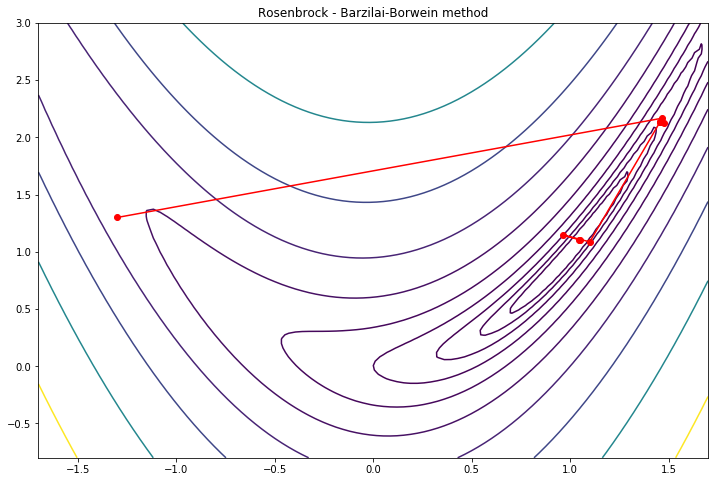

In [12]:
fig = figure(figsize=(12,8))

#fig, ax = plt.subplots(figsize=(16,12))
#CS = ax.contour(x, y, R)
#ax.clabel(CS, inline=1, fontsize=10)
contour(x, y, R, np.logspace(-1,2, 10), color="k")
title("Rosenbrock - Barzilai-Borwein method")

xmin, traj = bb(Rosen, dRosen, np.array([-1.3, 1.3]), 1e-1, 1e-8)
plot([traj[i][0] for i in range(len(traj))], [traj[i][1] for i in range(len(traj))], "r-o")

show()

## Comparison of the methods for a quadratic function

- Consider minimizing the quadratic function $f(x) = \frac12 x^T A x - b^T x$
- Example with quadratic function
\begin{align} 
f(x_1,x_2) & =x_1^2+x_2^2-1.9x_1x_2\\
 & = \frac{1}{2}\begin{bmatrix} x_1 \;\;\;x_2\end{bmatrix} \begin{bmatrix} 2 & -1.9\\ -1.9& 2\end{bmatrix}  \begin{bmatrix} x_1 \\x_2\end{bmatrix}\\
\end{align}


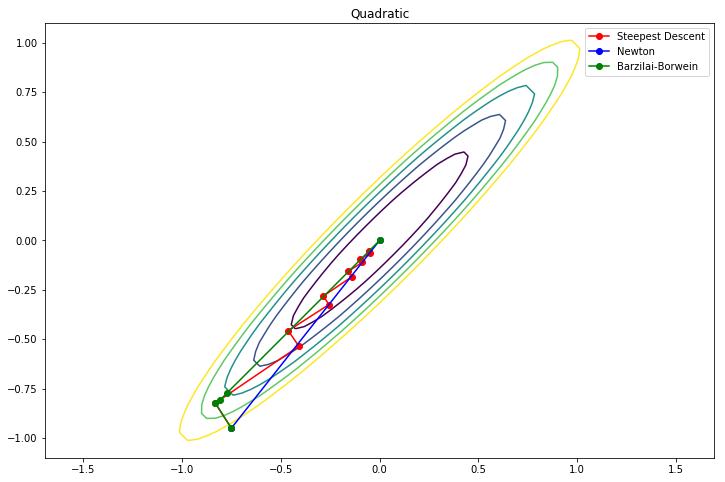

In [13]:
x, y = np.meshgrid(np.linspace(-1.1,1.1,50), np.linspace(-1.1,1.1,50))
Qxy = [[Q(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]
figure(figsize=(12,8))
contour(x, y, Qxy, linspace(0, 0.1, 6), color="k")
title("Quadratic")
axis('equal')
#axis([-1.5, 1.5, -1.1, 1.1])

xmin, traj = steepest_descent(Q, dQ, np.array([-0.75, -0.95]), 1e-2, 1e-2)
plot([traj[i][0] for i in range(len(traj))], [traj[i][1] for i in range(len(traj))], "r-o", label="Steepest Descent")

xmin, traj = newton(Q, dQ, ddQ, np.array([-0.75, -0.95]), 1e-2, 1e-2)
plot([traj[i][0] for i in range(len(traj))], [traj[i][1] for i in range(len(traj))], "b-o", label="Newton")

xmin, traj = bb(Q, dQ, np.array([-0.75, -0.95]), 1e-2, 1e-2)
plot([traj[i][0] for i in range(len(traj))], [traj[i][1] for i in range(len(traj))], "g-o", label="Barzilai-Borwein")


legend()

show()

- The steepest descent takes many steps (''zig-zagging'')
 - This behaviour deteriorates further as the condition number increases (longer-narrower valleys)
- Newton's method converges in one iteration because the order of convergence is $p=2$
 - This is because the Taylor series of a quadratic function is _exact_ at second order
- The Barzilai-Borwein method is a good compromise
 - Takeaway: An approximated Hessian can greatly improve convergence

# Conjugate Gradients

- Example with quadratic function
\begin{align} 
f(x_1,x_2) & =x_1^2+x_2^2-1.9x_1x_2\\
 & = \frac{1}{2}\begin{bmatrix} x_1 \;\;\;x_2\end{bmatrix} \begin{bmatrix} 2 & -1.9\\ -1.9& 2\end{bmatrix}  \begin{bmatrix} x_1 \\x_2\end{bmatrix}\\
\end{align}

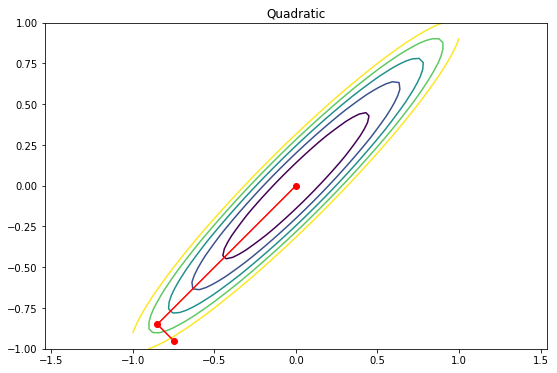

In [14]:
x, y = np.meshgrid(np.linspace(-1,1,50), np.linspace(-1,1,50))
Qxy = [[Q(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]
figure(figsize=(9,6))
contour(x, y, Qxy, linspace(0, 0.1, 6), color="k")
title("Quadratic")
axis('equal')

plot([-0.75, -0.85, 0], [-0.95, -0.85, 0], "r-o")

show()

- Example: $$ f(x, y) = x^2 + 50 y^2$$
 - The Hessian is $H=\nabla (\nabla f(x,y,))=\nabla \begin{pmatrix}2x\\ 100y\end{pmatrix}=\begin{pmatrix}2& 0\\0& 100\end{pmatrix}$
 - The eigenvalues are $\lambda_1=2$, $\lambda_2=100$
 - The condition number is $k=\lambda_{max}/\lambda_{min}=50$.  
 - The eigenvectors for $\lambda_1$ and $\lambda_2$ are, respectively $$ \begin{pmatrix} 1\\0\end{pmatrix}\;\;\; \textrm{and}\;\;\;\begin{pmatrix} 0\\1\end{pmatrix}$$
 - The direction of maximum variation is $y$, hence, the ellipsoid is elongated in the $x$ direction

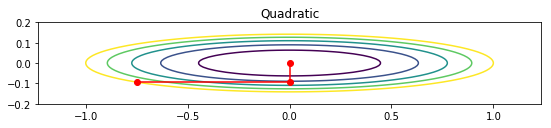

In [15]:
x, y = np.meshgrid(np.linspace(-1,1,50), np.linspace(-0.2,0.2,50))
def aQ(x):
    return x[0]**2+50*x[1]**2 
Qxy = [[aQ(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]
figure(figsize=(9,1.5))
contour(x, y, Qxy, linspace(0, 1, 6), color="k")
title("Quadratic")
axis('equal')

plot([-0.75, -0.0, 0], [-0.095, -0.095, 0], "r-o")

show()

## Conjugate Gradients as a search method


- If we could step along the eigendirections, the convergence would be faster than steepest descent's
- Eigendirections are good search directions even in ill-conditioned quadratic functions because they represent the principal axes of ellipsoids
 - This is mathematically a good idea, but computationally the calculation of eigenvectors is $\sim O(N^3)$, which is the same as computing the Hessian. 
 - Therefore, we do not want to use eigenvectors


<!--- - Things would _also_ be OK, if the quadratic was along the axes (i.e. $A$ is a diagonal matrix), and we stepped along the axis directions: --->

- Can we find a new coordinate system in which the search directions are orthogonal to each other?

Consider a set of directions $\{d_i\}$ for which 

$$
d_i^T A d_j = 0 \quad \mathrm{for}\quad i\neq j
$$
- This is called __conjugacy__. (If $\{d_i\}$ are eigenvectors, then by definition $Ad_i=\lambda_id_i$, where $\lambda_i$ is the eigenvalue. Therefore $d_i^TAd_j=\lambda_i\lvert\lvert d_i^Td_i\lvert\lvert$. This shows that eigenvectors fullfil the conjugacy condition. Therefore, if we start from an eigendirection, the conjugacy condition will find the next eigenvector, and so on.)

- Collect the directions into a matrix, 
$$ S = 
\begin{bmatrix}
\uparrow & \uparrow & \uparrow & \uparrow \\
d_1 & d_2 &\ldots& d_N \\
\downarrow & \downarrow & \downarrow & \downarrow 
\end{bmatrix}
$$

- Transform the coordinates into $y = S^{-1} x$, and set up the problem in the new coordinate system $y$:

$$ f(x) = f(S y) = \frac12 (Sy)^T A(Sy) - b^T Sy = \frac12 y^T (S^T A S) y - (S^T b)^T y$$

\begin{align}
S^T A S & = 
\begin{bmatrix}
\uparrow & \uparrow & \uparrow & \uparrow \\
d_1 & d_2 &\ldots& d_N \\
\downarrow & \downarrow & \downarrow & \downarrow 
\end{bmatrix}^T
A
\begin{bmatrix}
\uparrow & \uparrow & \uparrow & \uparrow \\
d_1 & d_2 &\ldots& d_N \\
\downarrow & \downarrow & \downarrow & \downarrow 
\end{bmatrix}
& \\
&\\
&=\begin{bmatrix} d_1^TAd_1 & d_1^TAd_2 &\ldots & d_1^TAd_N \\
d_2^TAd_1 & d_2^TAd_2 & \ldots & d_2^TAd_N \\ 
\vdots & \vdots & \ddots &\vdots\\
d_N^TAd_1 & d_N^TAd_2&\ldots&d_N^TAd_N
\end{bmatrix}
& \\
&\\
&=\begin{bmatrix} d_1^TAd_1 & 0 &\ldots & 0 \\
0 & d_2^TAd_2 & \ldots & 0 \\ 
\vdots & \vdots & \ddots &\vdots\\
0 & 0&\ldots&d_N^TAd_N
\end{bmatrix}
\end{align}

 - The matrix $S^T A S$ is diagonal because of the the conjugacy condition we imposed  
 - This is the critical property, which is central to the conjugate gradient


- The problem in the $y$ space is a quadratic form along the axes  
 - The axes of the $y$ space are the search directions $\{d_i\}$.

- How can we construct such a set of directions (ruling out the eigendirections, which would require the diagonalization of $A$)?

## Example on the difference between eigenvectors and conjugate vectors

- Consider the quadratic form expressed in the $x$ coordinate system
$$ f(x) = \frac{1}{2} x^T \underbrace{\begin{bmatrix} 3 & -1\\ -1& 3\end{bmatrix}}_{=A} x$$

- First, we discuss the eigendecomposition
\begin{align} 
\Lambda & = Q^{-1}AQ \\
& \\
\begin{bmatrix}2 & 0\\ 0 & 4 \end{bmatrix}
&= 
\begin{bmatrix}\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\ -\frac{1}{\sqrt{2}} &\frac{1}{\sqrt{2}}\end{bmatrix}
A
\begin{bmatrix}\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}} &\frac{1}{\sqrt{2}}\end{bmatrix}
\end{align}
 - The quadratic form in the space spanned by eigenvectors has coordinates $z$ and is diagonal 
\begin{align}
f(Qz) & = \frac{1}{2} z^TQ^T A Qz\\
& = \frac{1}{2} z^T \Lambda z
\end{align}
- Second, we discuss the conjugate directions. A matrix $S$ of conjugate directions that are not eigenvectors is  
\begin{align}
S & = \begin{bmatrix}1 & -5\\ 2 & 1 \end{bmatrix}
\end{align}
The first column is $d_1$, the second column is $d_2$, which are conjugate to each other. Thus, 
\begin{align}
D = S^T A S & = \begin{bmatrix}1 & 2\\ -5 & 1 \end{bmatrix} A \begin{bmatrix}1 & -5\\ 2 & 1 \end{bmatrix}\\
& = \begin{bmatrix}11 & 0\\ 0 & 88 \end{bmatrix}
\end{align}
 - The quadratic form in the space spanned by conjugate directions has coordinates $y$ and is diagonal 
\begin{align}
f(y) & = \frac{1}{2} y^TS^T A Sy\\
& = \frac{1}{2} y^T D y 
\end{align}
 Although diagonal, matrix $D$ does not contain the eigenvalues of $A$, thus, the conjugate directions $d_1$ and $d_2$ are not the  eigenvectors of $A$. 


## Finding the conjugate directions with the conjugate gradient method iteratively

- At iteration $k$, we have the gradient $\nabla f(x_k)$ and the previous search directions $\{d_1 \ldots d_{k-1}\}$. 

- We construct the new search direction as

$$
d_k = -\nabla f(x_k) + \beta_k d_{k-1}
$$

 Note that $d_k$ has "memory" of the previous direction $d_{k-1}$
- We impose the conjugacy condition
\begin{align}
0 &= d_{k-1}^T A d_k\\
0 &= d_{k-1}^T A (-\nabla f(x_k) + \beta_k d_{k-1})
\end{align}
  which yields 

$$\beta_k = \frac{d_{k-1}^T A \nabla f(x_k)}{d_{k-1}^T A d_{k-1}}$$
- It can be shown that with this choice of $\beta_k$, the search direction $d_k$ is conjugate to _all_ the previous directions 

Algorithm: 

1. Initialise with steepest descent $d_0 = -\nabla f(x_0)$
1. Update location and determine $\alpha_k$ with line search $$x_{k+1} = x_k + \alpha_k d_k$$  
1. Find new search direction: with this choice of $d_0$, it can be shown that  $$d_{k+1} = -\nabla f(x_{k+1}) + \left[\frac{\vert\lvert\nabla f(x_{k+1})\vert\lvert}{\vert\lvert\nabla f(x_k)\vert\lvert}\right]^2 d_k$$
 (Optional: A derivation of the identity $\beta_k = \left[\frac{\vert\lvert\nabla f(x_{k+1})\vert\lvert}{\vert\lvert\nabla f(x_k)\vert\lvert}\right]^2$ can be found on pages 270-271 in Luenberger, D. & Ye, Y. Linear and Nonlinear Programming, third edition, Springer. See the course booklist.)
1. Back to 2 until convergence.

In [1]:
def conjugate_gradients(f, df, x0, ftol, xtol=1e-3, n_restart=None):
    traj = []
    
    # get initial direction
    x = x0[:]
    df_new = df(x)
    d = -1.0*df_new
    alpha_init = 1e-6
    i = 0
    #print i, f(x), np.linalg.norm(d), x[:], d[:]
    traj.append((x[0],x[1]))

    # loop until convergence
    while np.linalg.norm(df_new) > ftol:
        i += 1
        # do line search in current direction 
        alpha = linesearch_golden_section(f, x, d, alpha_init, xtol)
        # update estimate
        x += alpha*d
        # get beta
        df_old = df_new[:]
        df_new = df(x)
        beta = (np.linalg.norm(df_new)/np.linalg.norm(df_old))**2
        # get new direction
        if n_restart == None or i%n_restart != 0:
            d = beta*d
        d += -1.0*df_new
        
        #print i, f(x), np.linalg.norm(d), x[:], d[:]
        traj.append((x[0],x[1]))

    return x[:],traj


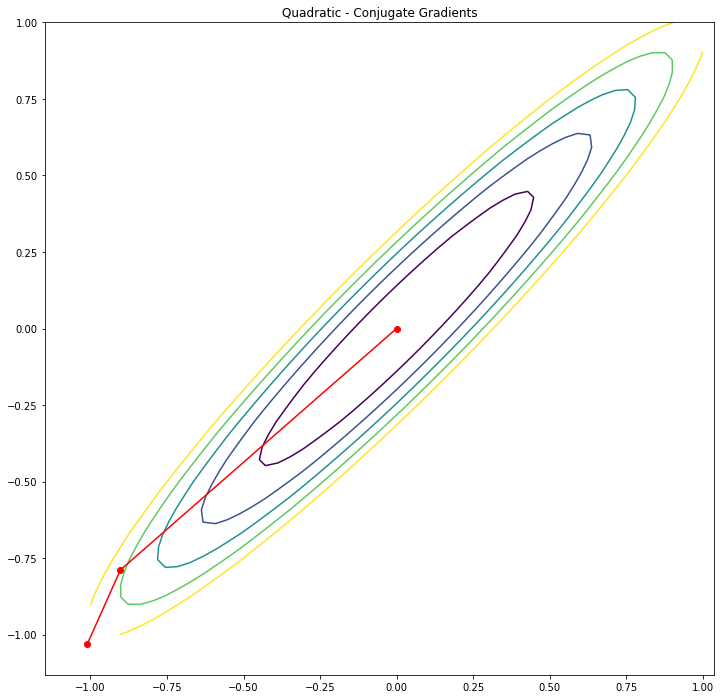

In [17]:
x, y = np.meshgrid(np.linspace(-1,1,50), np.linspace(-1,1,50))
Qxy = [[Q(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]
figure(figsize=(12,12))
contour(x, y, Qxy, linspace(0, 0.1, 6), color="k")
title("Quadratic - Conjugate Gradients")
axis('equal')

xmin, traj = conjugate_gradients(Q, dQ, np.array([-1.01, -1.03]), 1e-2, 1e-8)
plot([traj[i][0] for i in range(len(traj))], [traj[i][1] for i in range(len(traj))], "r-o")

show()

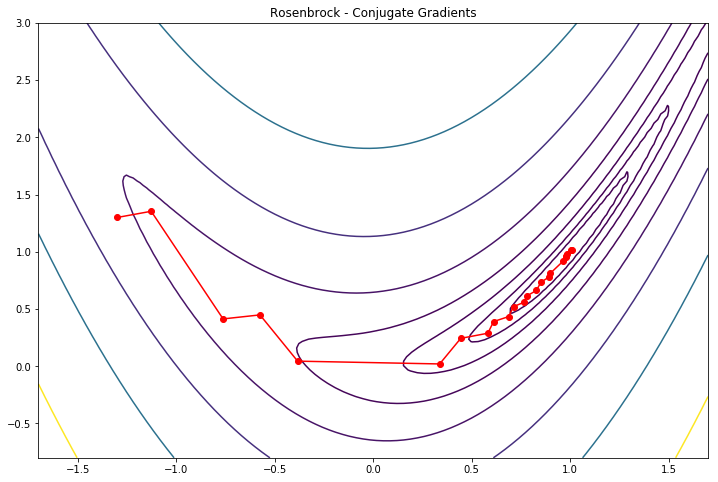

In [18]:
x,y = np.meshgrid(np.linspace(-1.7,1.7,100), np.linspace(-0.8,3,100))
R = [[Rosen(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]

fig = figure(figsize=(12,8))
contour(x, y, R, np.logspace(-1,2, 8), color="k")
title("Rosenbrock - Conjugate Gradients")
xmin, traj = conjugate_gradients(Rosen,dRosen, np.array([-1.3,1.3]), 1e-1, 1e-8,2)
plot([traj[i][0] for i in range(len(traj))], [traj[i][1] for i in range(len(traj))], "r-o")
show()

## Conjugate gradients final remarks

- It converges after $N$ iterations for an $N$ dimensional quadratic form with exact line search
- For a non-quadratic nonlinear function, search directions are approximately conjugate
- Numerical errors lead to _loss of conjugacy_
 - The algorithm can be periocally _reset_ by setting $d_k=-\nabla f(x_k)$
- The convergence is linear, $$ \|x_{k+1}-x^*\| = \beta \|x_k - x^*\|$$
 - But $\beta$ can be very small, $\beta \approx 0$. This is called "superlinear convergence" 
- For large ill-conditioned problems, it can be shown that $$\beta \approx 1-\frac{2}{\sqrt{\kappa}}$$ where $\kappa$ is the condition number. 
 - $\beta$ is smaller than the steepest descent's
- The CG method does _not_ require the Hessian and its inversion
- The CG method was originally invented to solve linear systems $Ax = b$. 
  - Note the relationship with the quadratic problem 

\begin{align}
f(x) &= \frac12 x^T A x - b^T x\\
\nabla f(x) &= Ax - b 
\end{align}

## The conjugate gradient method is a Krylov subspace method

Consider the first two iterations 

1. Start at $x_0$
2. $d_0 = b-A x_0$
3. $x_1 = x_0 + \alpha_1 d_0$
4. \begin{align}
d_1 &= b-A x_1  + \beta_1 d_0 \\
& = b-A ( x_0 + \alpha_1 d_0 ) + \beta_1 d_0  \\
& = b-A ( x_0 + \alpha_1 (b-A x_0 ) ) + \beta_1 (b-A x_0 ) \\
\end{align}

- The direction after $k$ steps is a linear combination of the vectors

$$
A x_0, A^2 x_0, A^3 x_0, \ldots, A^k x_0
$$

- The corresponding subspace is called __Krylov subspace__
- We often solve $Ax = b$ in the Krylov subspace for large matrices
- There is a large variety of methods called "Krylov subspace methods". 
  - The conjugate gradient is one of them. 

## Summary of multi-dimensional search-direction methods

| Method | Advantages | Disadvantages 
|:-|:-|:-
| Steepest descent | Only needs gradient | Linear convergence<br>slow for ill-conditioned problem |
| Newton-Raphson  | Quadratic Convergence | Needs Hessian<br>can diverge |
| Newton-Raphson with line search | Quadratic Convergence<br> more reliable | Needs Hessian |
| Conjugate gradient | Faster than Steepest Descent | Linear convergence |
| Barzilai-Borwein | Often very stable,<br>faster than Steepest Descent | Convergence analysis<br>difficult in general | 

## Least squares fitting of a model to data

One common optimization task involves a cost function that enables a simplification.
Let 

- $y_j$ be the measured data, $j = 1,2,\ldots m$
- $\phi(x)$ be the (generally nonlinear) model we are fitting, with $\phi_j(x)$ being the  model's prediction for $y_j$
- $x = [x_1,\ldots,x_n]^T$ be the vector of independent parameters, which can be tuned for the model to fit the data

The elements of the __residual__ vector $r(x)$ are the errors in the model's predictions for each piece of data

$$ r_j(x) = \phi_j(x) - y_j $$

- For all the pieces of data, the total error is 

$$ f(x) = \sum_{j=1}^m r_j^2(x)  = r(x)^T r(x) $$

- The optimization task is to minimize $f(x)$. 

The gradient of $f(x)$ is
\begin{align}
\nabla f(x) &= \frac{\partial f}{\partial x_i}\;\;\;i=1,2,\ldots,m\\
& = \frac{\partial}{\partial x_i}\left(\sum_{j=1}^m r_j(x)^2\right)\;\;\;i=1,2,\ldots,m \\
& = 2 \sum_{j=1}^m \frac{\partial r_j(x)}{\partial x_i} r_j(x) \;\;\;i=1,2,\ldots,m \\
&= 2 J(x)^T r(x)
\end{align}

where $J(x)$ is the __Jacobian matrix__ of $r(x)$

$$
J(x) = 
\begin{bmatrix}
\frac{\partial r_1}{\partial x_1} & \cdots & \frac{\partial r_1}{\partial x_n}\\
\vdots & \ddots & \vdots\\
\frac{\partial r_m}{\partial x_1} & \cdots & \frac{\partial r_m}{\partial x_n}\\
\end{bmatrix}
$$

The Hessian matrix $H(x)$ of $f(x)$ is expressed as 

$$ H(x) = \nabla (\nabla f(x)) = 2 J(x)^T J(x) + 2 \sum_{j=1}^m r_j(x) R_j(x) $$

where $R_j(x)$ is the Hessian of the residual $r_j(x)$, i.e., $R_j(x) = \nabla(\nabla r_j(x))$

## The Gauss-Newton method

- Let us assume that the residuals at the optimum $r_j(x^*)$ are small, i.e., the model gives a good fit
- Therefore $R_j$ can be neglected. The Hessian $H(x)$ can be approximated as 
$$H(x) \approx \tilde H(x) = 2J(x)^T J(x)$$
for $x$ near the minimum $x^*$, with $\tilde H(x)$ being positive definite.  

- In the Gauss-Newton method, the search direction is then
$$
\begin{array}
~d_k &= -\left[\tilde H(x_k)\right]^{-1} \nabla f(x_k)\\
 &= - \left[ 2J(x_k)^T J(x_k)\right]^{-1} \nabla f(x_k) \\ 
  &= - \frac{1}{2}\left[J(x_k)^T J(x_k)\right]^{-1} 2J(x_k)^T r(x_k) \\
 &= -J(x_k)^{+} r(x_k)\\
\end{array}
$$
where $J^+=\left[J(x_k)^T J(x_k)\right]^{-1} J(x_k)^T$ is the pseudoinverse matrix. 

-  The sequence of estimates is $$x_{k+1} = x_k + d_k$$

In order to find the search directions $d_k$ at each iteration, the following _linear problem_ needs to be solved, 
\begin{align}
d_k& = -J(x_k)^{-1}[J(x_k)^{T}]^{-1}J(x_k)^Tr(x_k)\\
&=-J(x_k)^{-1}r(x_k)
\end{align}
Therefore 
$$J(x_k) d_k = -r(x_k)$$
which is usually easy. 

- The rank of $J$ is the smallest between the number of fitting parameters, $n$, and the pieces of data, $m$. 
- We do not need to invert any large ill-conditioned matrix
- The Gauss-Newton methods converges nearly quadratically, if the residuals are small

## You have now the tools to do all examples paper 3

## Answers to common questions asked by students after lectures 3 and 4

1. The search directions of the steepest descent in the Rosenbrock function example do not _look_ orthogonal to each other in the final plot. Why?
 - With an exact line search, the steepest descent directions are orthogonal to each other. 
 - The directions do not look orthogonal to each other in the plot, but this is only an "optical illusion"
 - Make the aspect ratio of the figure equal, and you will see the orthogonality. E.g.,  use fig = figure(figsize=(12,12))
 
1. Consider the minimisation of an $N$-dimensional function where $N>2$. Is the line search an $N-1$-dimensional search?
 - No, it is not. The line search is _always_ a one-dimensional  minimisation problem.
 
1. Can the algorithms of these lectures find global minimum?
 - These algorirthm are designed to solve $\nabla f(x)=0$, therefore, they are designed to find stationary points.
 - If the function is convex, the local minimum is the global minimum. 
 
1. Are the conjugate directions eigenvectors of the Hessian?
 -    Only in one case: when we choose the eigenvectors as conjugate directions. The eigenvectors diagonalise the Hessian _and_ the terms of the diagonal are the eigenvalues of the Hessian.
  (Remember that an eigenvalue $\lambda$ is defined by the equation $\det(A-\lambda I)=0$ where $I$ is the identity matrix.)
 - If the conjugate directions are not eigenvectors, which is the typical case, the answer is no. The conjugate directions diagonalise the Hessian _but_ the terms of the diagonal are not the eigenvalues of the Hessian.
 
5. How can we derive $\beta_k$ for the conjugate gradient method? (This is optional.)

   For brevity, we define $g_{k}:=\nabla f(x_k)=Ax_k-b$. From the conjugate gradient method, $g_{k+1}^T g_{k}=0$ and $g_k^Td_i=0$ if $i<k$, which are the two properties we use for this proof. So: 
   \begin{align}
   g_{k+1} &= Ax_{k+1} - b \\
   & = A(x_{k+1}-x_k) + Ax_k - b \\
   & = A(\alpha_kd_k) + g_k
   \end{align}
   Take the inner product with $g_{k+1}$
   \begin{align}
   g_{k+1}^T g_{k+1} &= \alpha_k g_{k+1}^T Ad_k + \underbrace{g_{k+1}^Tg_k}_{=0} \\ 
   &= \left(-\frac{g_k^Td_k}{d_k^T A d_k}\right) g_{k+1}^T Ad_k 
   \end{align}
   Hence
      \begin{align}
   -\frac{g_{k+1}^T g_{k+1}}{g_k^T d_k}
   &= \frac{g_{k+1}^T Ad_k}{d_k^T A d_k}  
   \end{align}
   Note that $$ g_k^T d_k = g_k^T (-g_k + \beta_{k}d_{k-1})=-g_k^Tg_k\;\;\;\;\textrm{because we start with $d_0=-g_0$}$$ therefore
    \begin{align}
   \frac{g_{k+1}^T g_{k+1}}{g_k^T g_k}
   &= \frac{g_{k+1}^T Ad_k}{d_k^T A d_k}  
   \end{align}
   We recognize the right-hand side as $\beta_{k+1}$, which proves the identity. 
   
    